In [274]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 500000)
pd.set_option('display.max_columns', 1000000)
pd.set_option('display.width', 100000)

In [275]:
ds = pd.read_csv('ml_data.csv')

In [276]:
ds.dtypes

Date         object
Open        float64
High        float64
Low         float64
Close       float64
Volume      float64
compound    float64
neg         float64
neu         float64
pos         float64
dtype: object

In [277]:
ds['Date'] = pd.to_datetime(ds['Date'])

In [278]:
ds.tail()

,Date,Open,High,Low,Close,Volume,compound,neg,neu,pos
14582,2019-12-05,132.990005,133.240005,131.630005,131.910004,3595400.0,0.3983,0.057,0.813,0.130
14583,2019-12-06,132.750000,133.889999,132.699997,133.220001,3437500.0,0.9939,0.055,0.607,0.338
14584,2019-12-09,133.350006,134.589996,133.259995,133.919998,2968500.0,0.9955,0.000,0.620,0.380
14585,2019-12-10,133.919998,134.839996,133.559998,133.910004,3480400.0,0.9183,0.000,0.791,0.209
14586,2019-12-11,134.110001,134.509995,133.669998,133.759995,3953300.0,0.9508,0.037,0.706,0.257


# Checking distribution of target variable and sentiment


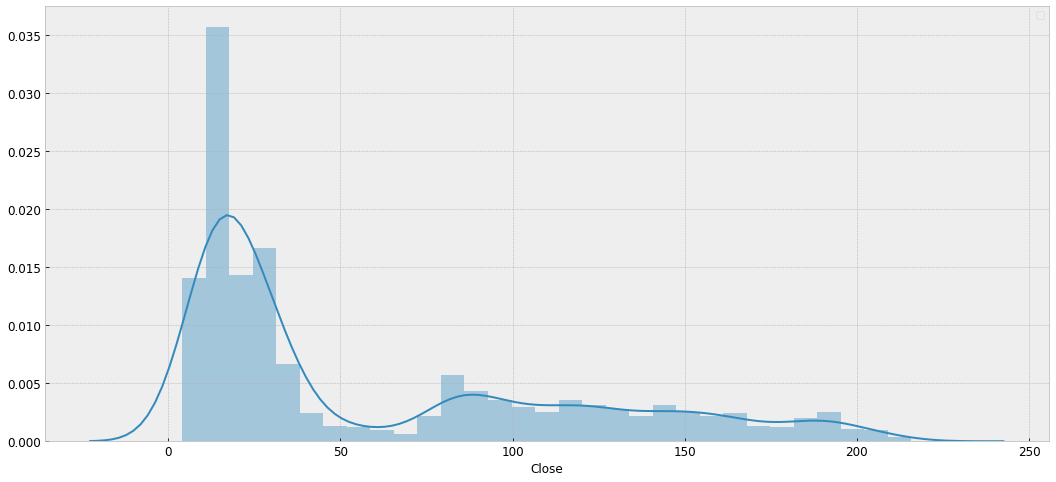

In [279]:
sns.distplot(ds['Close'])
plt.legend()
plt.show()

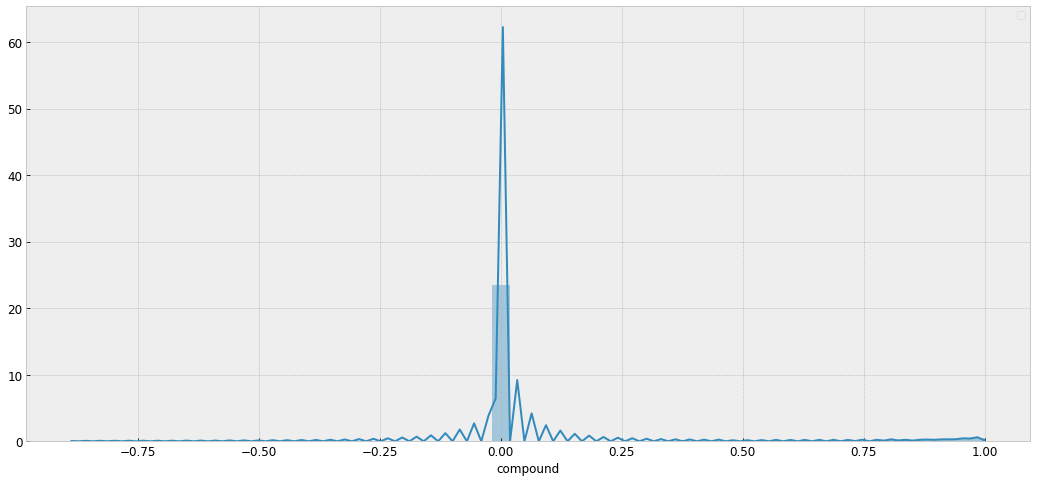

In [244]:
sns.distplot(ds['compound'])
plt.legend()
plt.show()

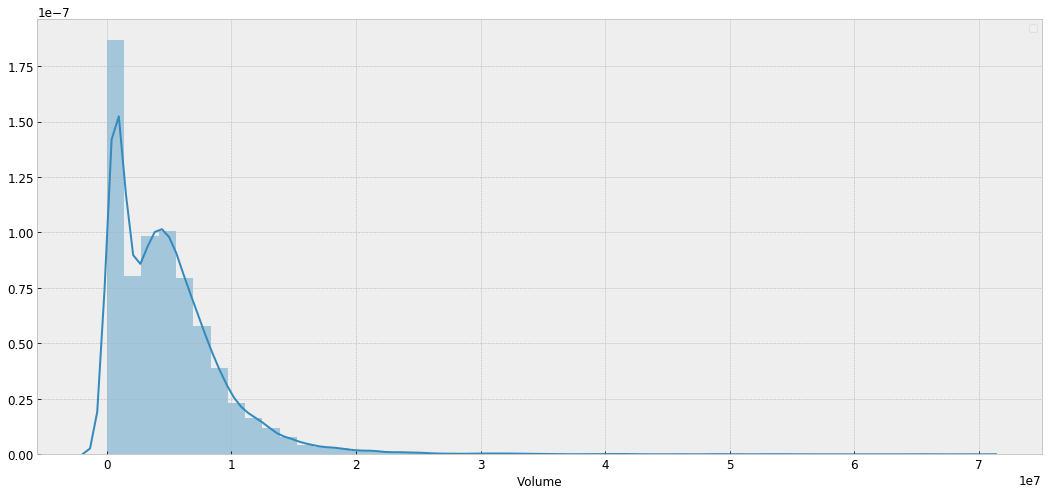

In [245]:
sns.distplot(ds['Volume'])
plt.legend()
plt.show()

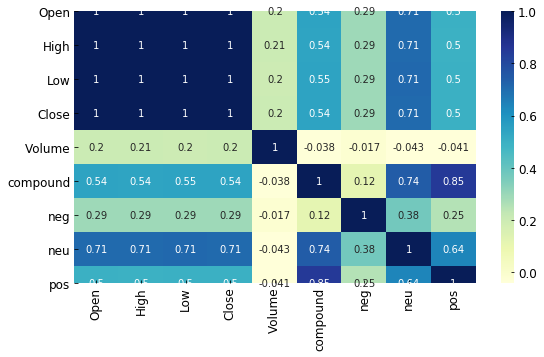

In [246]:
#checking for collinearity 
fig, ax = plt.subplots(figsize=(9,5)) 
ax = sns.heatmap(ds.corr(), annot=True, cmap="YlGnBu")

In [247]:
#dropping highly related variables
ds.drop(['Open', 'High', 'Low'], axis=1, inplace=True)

In [248]:
ds.tail()

,Date,Close,Volume,compound,neg,neu,pos
14582,2019-12-05,131.910004,3595400.0,0.3983,0.057,0.813,0.130
14583,2019-12-06,133.220001,3437500.0,0.9939,0.055,0.607,0.338
14584,2019-12-09,133.919998,2968500.0,0.9955,0.000,0.620,0.380
14585,2019-12-10,133.910004,3480400.0,0.9183,0.000,0.791,0.209
14586,2019-12-11,133.759995,3953300.0,0.9508,0.037,0.706,0.257


# Importing libraries and choosing models to be used

In [273]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor,MLPClassifier

#evaluation 
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

# MLP regression

In [294]:
ds_mlp = ds.drop(['Date'], axis=1)

In [295]:
y = ds_reg['Close']
X = ds_reg.drop('Close', axis = 1)

In [391]:
X_std = scaler.fit_transform(X)

In [392]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state = 31)

In [393]:
MLP = MLPRegressor(hidden_layer_sizes=(10,4),learning_rate='constant', solver = 'lbfgs', activation = 'relu')

In [394]:
model = MLP.fit(X_train, y_train)  #fit the model
y_pred = MLP.predict(X_test)

In [395]:
acc = MLP.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [396]:
print(f"Model accuracy {round(acc, 1)*100}%")
print(f"Mean square error {round(mse, 3)}")
print(f"Mean absolute error {round(mae, 3)}")

Model accuracy 70.0%
Mean square error 1031.226
Mean absolute error 23.219


# Linear regression 

In [263]:
ds_reg = ds.drop(['Date'], axis=1)

In [264]:
y = ds_reg['Close']
X = ds_reg.drop('Close', axis = 1)

In [265]:
#scaler = StandardScaler()

X_std = scaler.fit_transform(X)

In [266]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state = 31)

In [267]:
#from sklearn import preprocessing
#min_max_scalar=preprocessing.MinMaxScaler()
#X_train=min_max_scalar.fit_transform(X_train)
#X_test=min_max_scalar.fit_transform(X_test)
#y_train=min_max_scalar.fit_transform(y_train)
#y_test=min_max_scalar.fit_transform(y_test)

In [268]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(11669, 5) (2918, 5) (11669,) (2918,)


In [269]:
linreg = LinearRegression()
model = linreg.fit(X_train, y_train)  #fit the model
y_pred = linreg.predict(X_test)

In [271]:
acc = linreg.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [272]:
print(f"Model accuracy {round(acc, 1)*100}%")
print(f"Mean square error {round(mse, 3)}")
print(f"Mean absolute error {round(mae, 3)}")

Model accuracy 60.0%
Mean square error 1383.896
Mean absolute error 29.08


# KNN (with sentiment polarity features)

In [41]:
ds1 = ds.drop(['Date'], axis=1)

In [42]:
y = ds1['Close']
X = ds1.drop('Close', axis = 1)

In [43]:
scaler = StandardScaler()
# Scales to standardized value
X_std = scaler.fit_transform(X)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state = 31)

In [45]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(11669, 5) (2918, 5) (11669,) (2918,)


In [46]:
knnr = KNeighborsRegressor(n_neighbors = 3)
model = knnr.fit(X_train, y_train)  #fit the model
y_pred = knnr.predict(X_test)

In [47]:
acc = knnr.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [48]:
print(f"Model accuracy {round(acc, 1)*100}%")
print(f"Mean square error {round(mse, 3)}")
print(f"Mean absolute error {round(mae, 3)}")
#print(f"r2 score {round(r2, 5)}")

Model accuracy 60.0%
Mean square error 1421.039
Mean absolute error 25.214


Very low accuracy - model does not suit needs

# Arima

In [49]:
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['text.color'] = 'k'

In [50]:
%matplotlib inline

In [51]:
ds4 = ds[['Date', 'Close']]
ds4 = ds.set_index('Date')

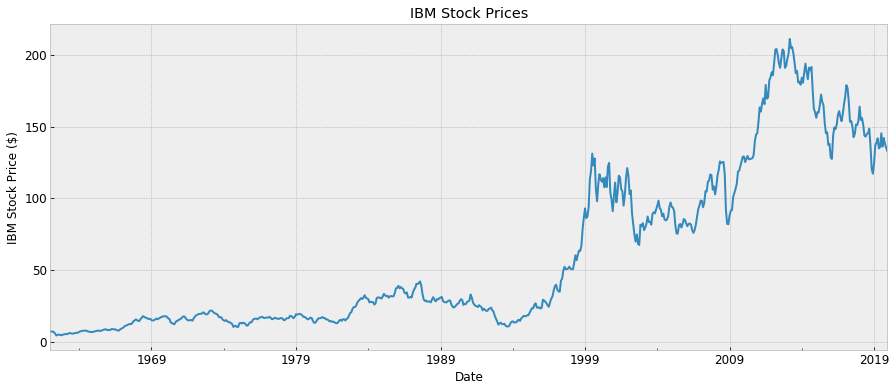

In [52]:
plt.style.use('bmh')
plt.title('IBM Stock Prices')
plt.xlabel('Date')
plt.ylabel('IBM Stock Price ($)')

ds4['Close'].resample('M').mean().plot(figsize=(15, 6))

plt.savefig('stock_prices_IBM.jpg', bbox_inches = 'tight', transparent = True)
plt.show()

In [53]:
# filtering dataset for a period where stock are decreasing
ds7 = ds[(ds['Date'] > '2015-08-31') & (ds['Date'] < '2016-02-17')]

In [54]:
ds7 = ds7.set_index('Date')

In [55]:
ds7.head()

,Close,Volume,compound,neg,neu,pos
Date,,,,,,
2015-09-01,142.679993,5272000.0,0.8295,0.0,0.862,0.138
2015-09-02,145.050003,4252000.0,0.9814,0.0,0.784,0.216
2015-09-03,146.779999,3603500.0,0.8426,0.0,0.878,0.122
2015-09-04,143.699997,4201100.0,0.8105,0.0,0.895,0.105
2015-09-08,147.229996,3933300.0,0.8472,0.0,0.739,0.261


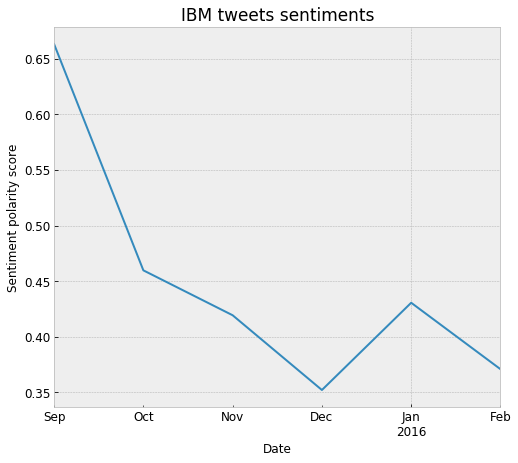

In [56]:
# Plotting sentiment over time

plt.title('IBM tweets sentiments', fontsize=17)
plt.xlabel('Date')
plt.ylabel('Sentiment polarity score')

ds7['compound'].resample('M').mean().plot(figsize=(8, 7))

plt.savefig('IBM_sentiment_tweets_period.jpg', bbox_inches = 'tight', transparent = True)
plt.show()

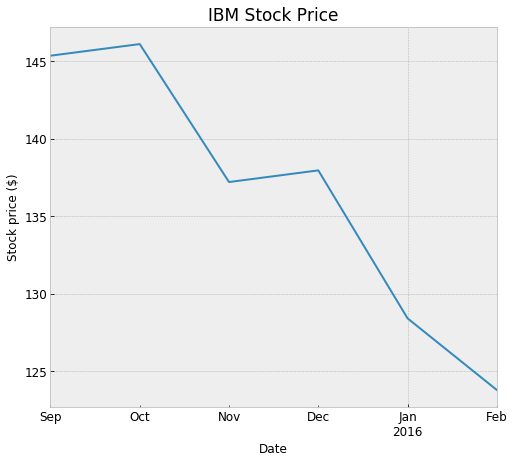

In [57]:
plt.title('IBM Stock Price', fontsize= 17)
plt.xlabel('Date')
plt.ylabel('Stock price ($)')

ds7['Close'].resample('MS').mean().plot(figsize=(8, 7))

plt.savefig('IBM_stock_period.jpg', bbox_inches = 'tight', transparent = True)
plt.show()

In [58]:
y = ds4['Close'].resample('MS').mean()

# Seasonal study

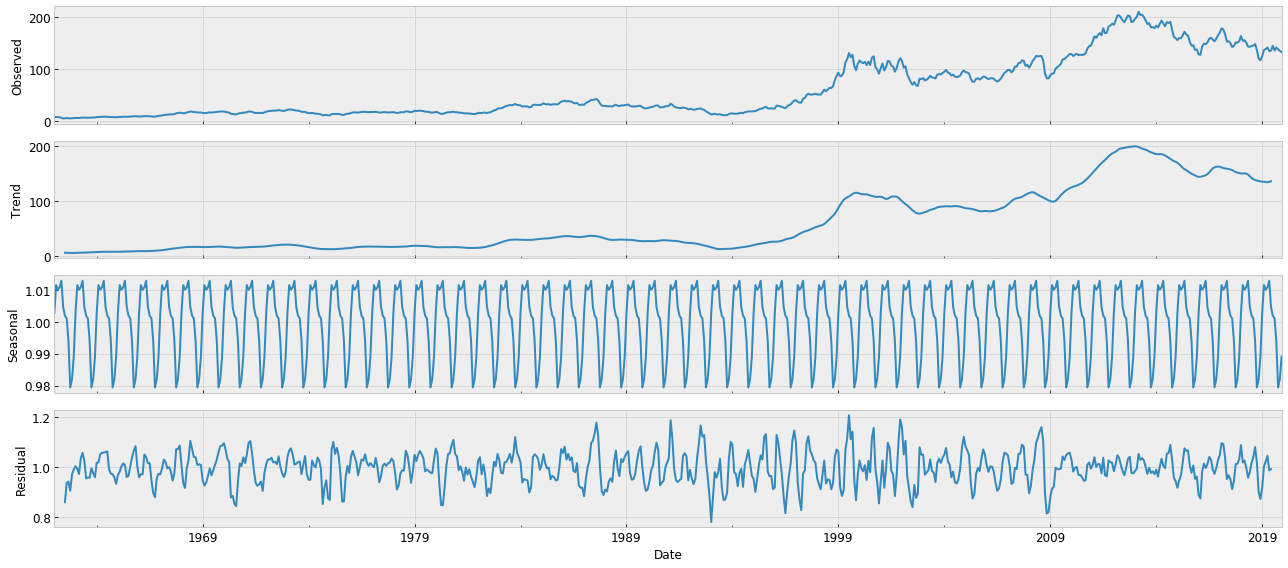

In [59]:
from pylab import rcParams
import statsmodels.api as sm

rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='multiplicative') 
from scipy import signal
fig = decomposition.plot()
plt.savefig('seasonal_study.png', bbox_inches = 'tight', transparent = True)
plt.show()


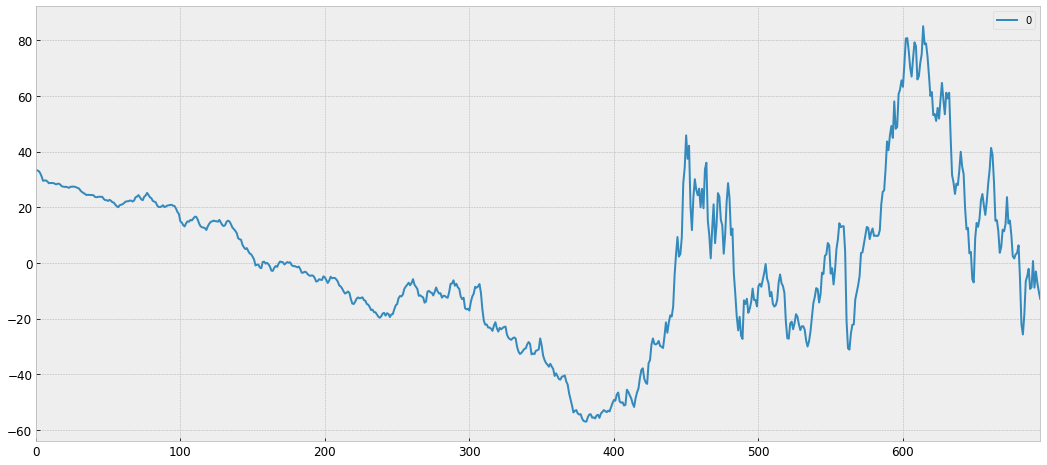

In [60]:
from scipy import signal

detrend = signal.detrend(y)
detrend2 = pd.DataFrame(detrend)
fig = detrend2.plot()
plt.show()

# Autocorrelation plot

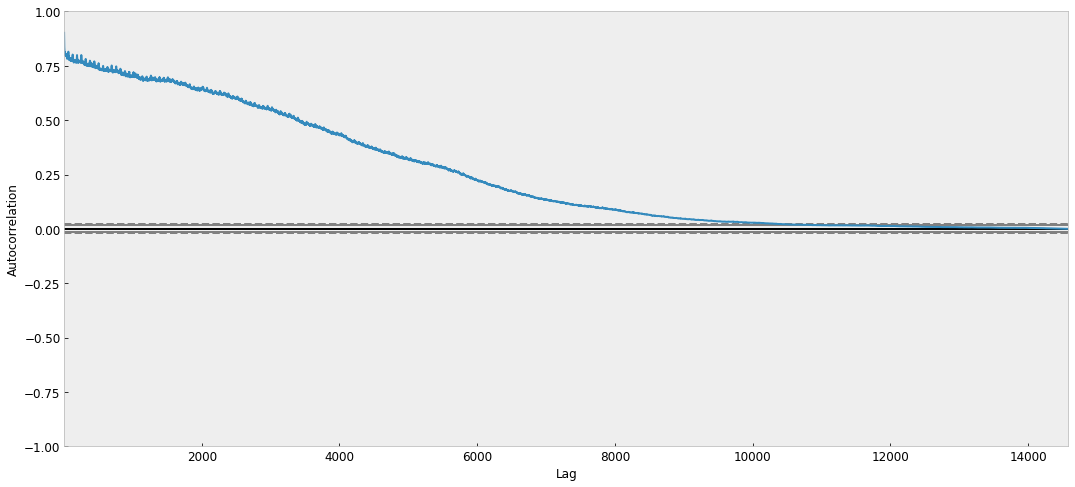

In [61]:
from pandas.plotting import autocorrelation_plot
 # probability of autocorrelation (hypothesis testing)
autocorrelation_plot(ds4)
plt.show()

In [62]:
from statsmodels.tsa.stattools import adfuller
adfuller(y, autolag = 'AIC')
# checks if time series data is stationary

(-0.7663529021845112,
 0.8288064403910107,
 8,
 687,
 {'1%': -3.439904442607456,
  '5%': -2.8657562268758907,
  '10%': -2.569015252972123},
 3849.4973371272545)

# Arima model

In [94]:
ds5 = ds4['Close']

In [95]:
ds5.head()

Date
1962-01-02    7.626667
1962-01-03    7.693333
1962-01-04    7.616667
1962-01-05    7.466667
1962-01-08    7.326667
Name: Close, dtype: float64

/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                14586
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -23644.096
Method:                       css-mle   S.D. of innovations              1.224
Date:                Wed, 18 Dec 2019   AIC                          47302.192
Time:                        14:41:09   BIC                          47355.307
Sample:                             1   HQIC                         47319.839
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0086      0.010      0.906      0.365      -0.010       0.027
ar.L1.D.Close    -0.0177      0.008     -2.138      0.033      -0.034      -0.001
ar.L2.D.Close    -0.0063      0.008     

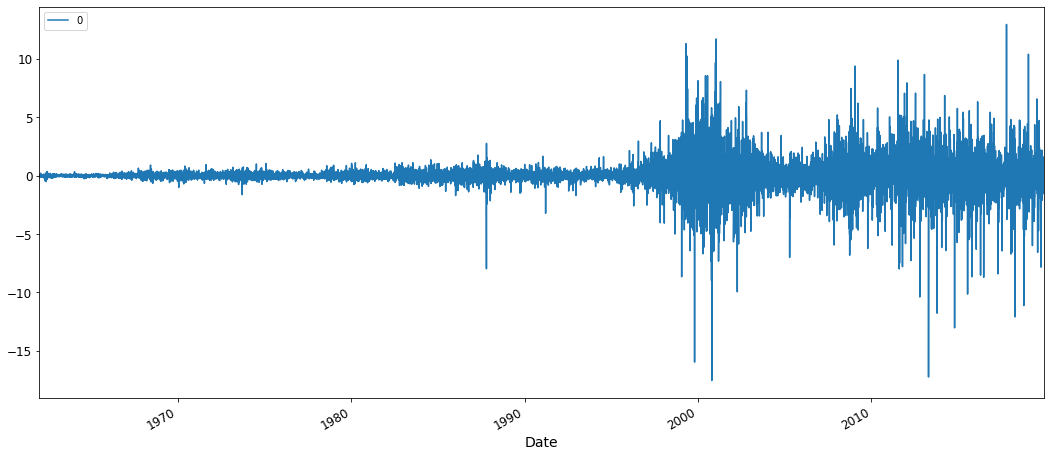

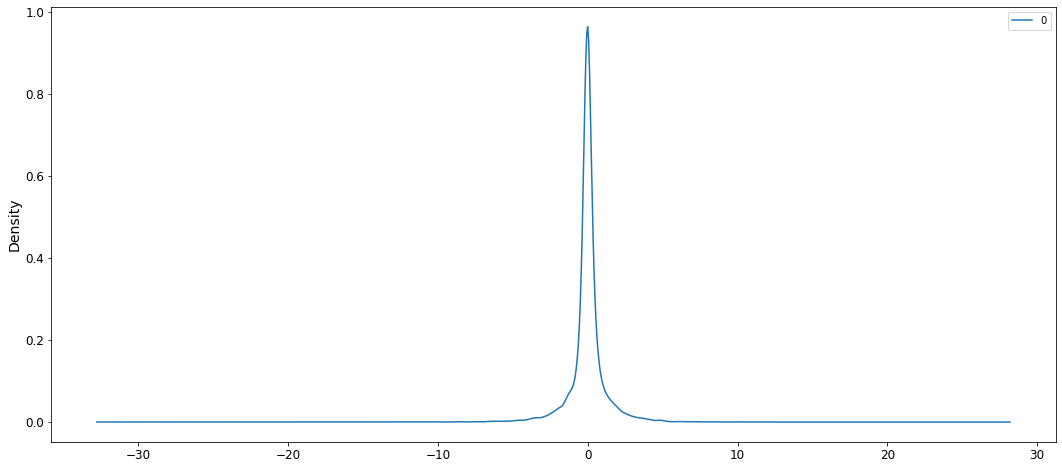

                  0
count  1.458600e+04
mean  -5.520389e-07
std    1.223981e+00
min   -1.753465e+01
25%   -2.442537e-01
50%   -7.554045e-03
75%    2.601781e-01
max    1.294861e+01


In [96]:
from statsmodels.tsa.arima_model import ARIMA
 
model = ARIMA(ds5, order=(5,1,0))
model_fit = model.fit(disp=0)

print(model_fit.summary())

# plot residual errors: residual of an observed value is 
# the difference between the observed value and the estimated value of the quantity of interest 
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

# Model implementation

In [97]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
 
X = ds5.values
size = int(len(X) * 0.75)   # Split percentage of dataset

train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0)) # order is algorithm numbers (best 0-6)
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
    
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Test MSE: 3.451


In [98]:
# Saving model
model_fit.save('arima_model.model')

# Plotting forecasts

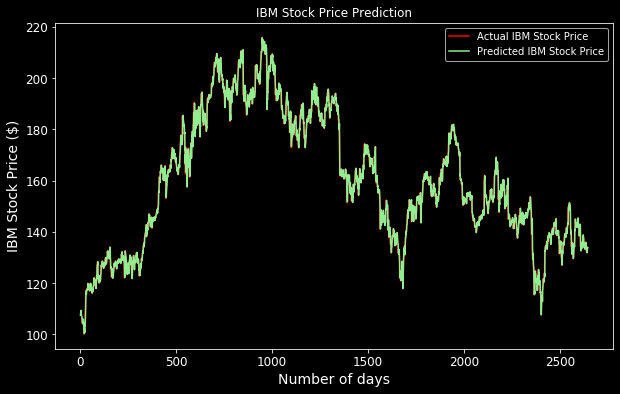

In [120]:
plt.figure(figsize=(10,6))
plt.plot(test[1000:], color='red', label='Actual IBM Stock Price')
plt.plot(predictions[1000:] , color='lightgreen', label='Predicted IBM Stock Price')
plt.title('IBM Stock Price Prediction')
plt.xlabel('Number of days')
plt.ylabel('IBM Stock Price ($)')
plt.legend()
plt.savefig('forecast2.jpg', bbox_inches = 'tight', transparent = True)
plt.show()


# Sarimax

In [409]:
import warnings
import itertools
import numpy as np
warnings.filterwarnings("ignore")
import pandas as pd
import statsmodels.api as sm
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['text.color'] = 'k'

In [410]:
ds_ar = ds

In [411]:
ds_ar.drop(['Volume', 'compound', 'neg', 'neu', 'pos'], axis=1, inplace=True)

In [412]:
ds_ar = ds_ar.set_index('Date')

In [413]:
ds_ar.index

DatetimeIndex(['1962-01-02', '1962-01-03', '1962-01-04', '1962-01-05', '1962-01-08', '1962-01-09', '1962-01-10', '1962-01-11', '1962-01-12', '1962-01-15',
               ...
               '2019-11-27', '2019-11-29', '2019-12-02', '2019-12-03', '2019-12-04', '2019-12-05', '2019-12-06', '2019-12-09', '2019-12-10', '2019-12-11'], dtype='datetime64[ns]', name='Date', length=14587, freq=None)

In [414]:
y = ds_ar['Close'].resample('MS').mean()

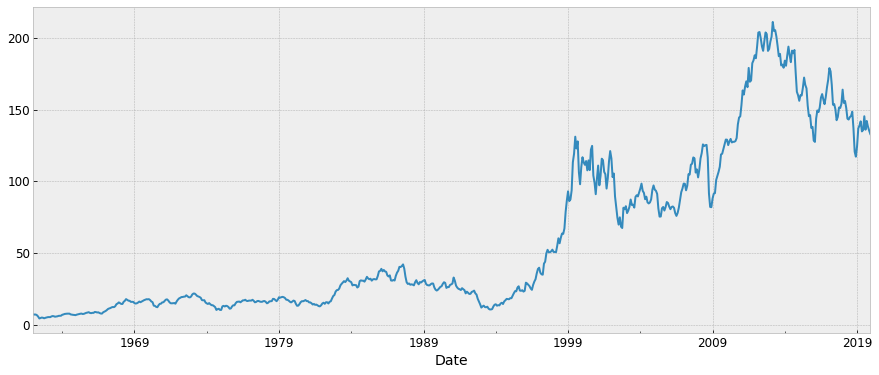

In [415]:
y.plot(figsize=(15, 6))
plt.show()

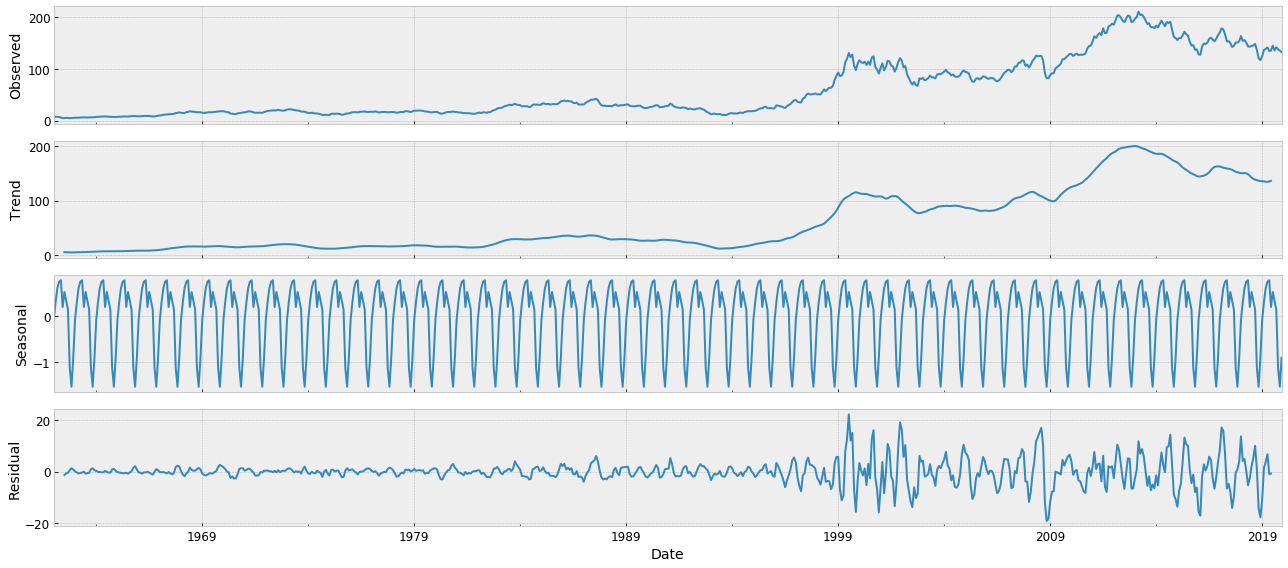

In [416]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [417]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [418]:
#Grid search for optimal set of parameters 
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order = param,
                                            seasonal_order = param_seasonal,
                                            enforce_stationarity = False,
                                            enforce_invertibility = False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param,param_seasonal, results.aic))
        except:
            continue


ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:8114.121786281921
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:7232.875897603063
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:5636.576874668045
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:5541.240301141461
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:5644.577439355507
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:5630.147000789677
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:5547.26259177074
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:5541.671930490977
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:7181.663454451487
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:6355.456305667607
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:4960.94993674597
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:4886.9288377270295
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:4976.26064892386
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:4969.847929315172
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:4899.527814068419
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:4888.928837481593
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:3967.735810550298
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:3912.8212867074567
ARIMA(0, 1,

In [419]:
# lowest AIC
#ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:3858.09671666074

In [420]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(0, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.1758      0.024      7.252      0.000       0.128       0.223
ma.S.L12      -0.9617      0.017    -58.106      0.000      -0.994      -0.929
sigma2        17.9243      0.508     35.269      0.000      16.928      18.920


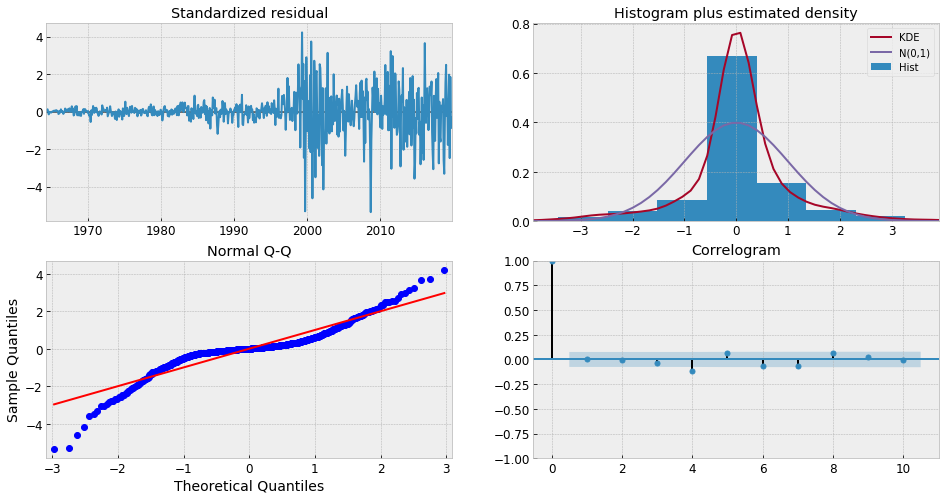

In [421]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

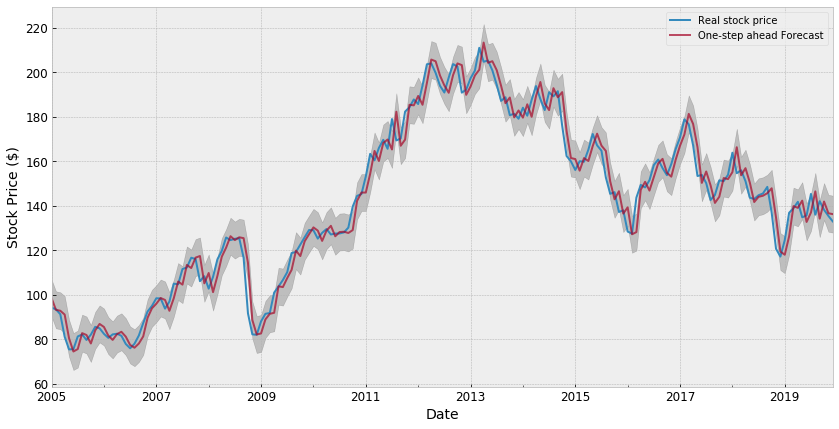

In [426]:
pred = results.get_prediction(start=pd.to_datetime('2005-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2005':].plot(label='Real stock price')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Stock Price ($)')
plt.legend()
plt.savefig('stock_prediction_arima.jpg', bbox_inches = 'tight', transparent = True)
plt.show()

In [77]:
y_forecasted = pred.predicted_mean
y_truth = y['2012-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 41.68


In [78]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 6.46


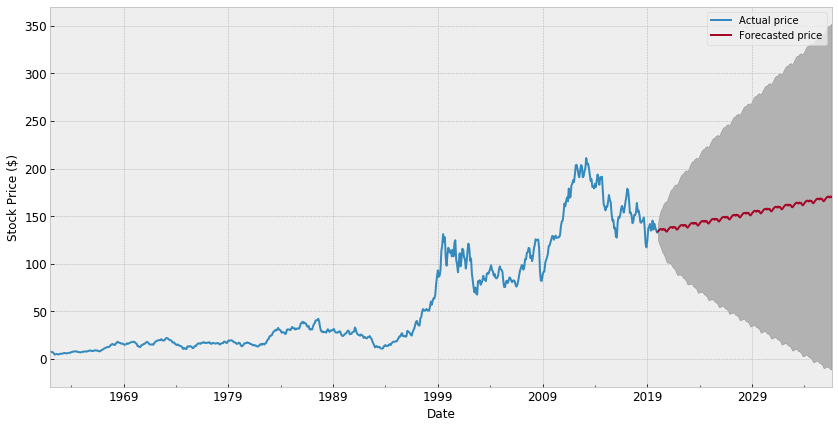

In [80]:
plt.style.use("bmh") 

pred_uc = results.get_forecast(steps=200)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='Actual price', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecasted price')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Stock Price ($)')
plt.legend()
plt.savefig('stock_prediction.jpg', bbox_inches = 'tight', transparent = True)
plt.show()

In [107]:
forecast = pred_uc.predicted_mean

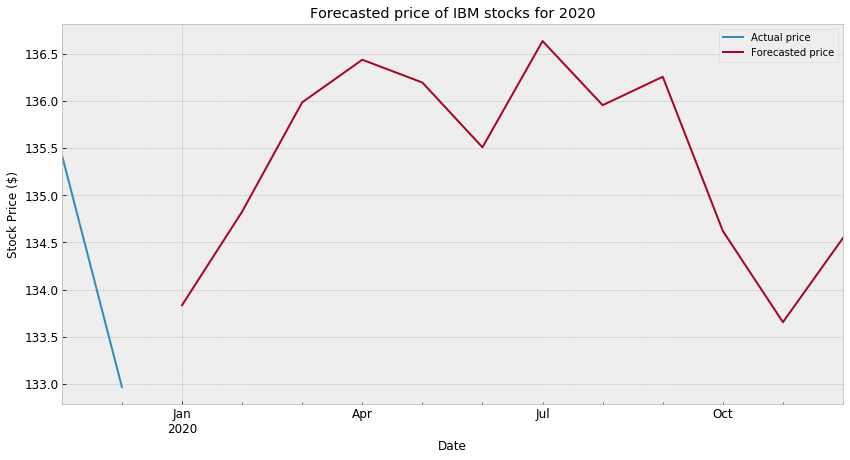

In [129]:
# Plot forecast for january 2020
plt.title('Forecasted price of IBM stocks for 2020')

ax = y['2019-11':].plot(label='Actual price', figsize=(14, 7))
forecast[:'2020'].plot(ax=ax, label='Forecasted price')
ax.set_xlabel('Date')
ax.set_ylabel('Stock Price ($)')
plt.legend()
plt.savefig('stock_prediction_2020.jpg', bbox_inches = 'tight', transparent = True)
plt.show()

# Time series with Prophet

In [398]:
from fbprophet import Prophet

In [399]:
ds_pro = ds

In [400]:
ds_pro = ds_pro.rename(columns={'Date': 'ds', 'Close': 'y'})

In [401]:
ds_pro.head()

,ds,Open,High,Low,y,Volume,compound,neg,neu,pos
0,1962-01-02,7.713333,7.713333,7.626667,7.626667,387200.0,0.0,0.0,0.0,0.0
1,1962-01-03,7.626667,7.693333,7.626667,7.693333,288000.0,0.0,0.0,0.0,0.0
2,1962-01-04,7.693333,7.693333,7.613333,7.616667,256000.0,0.0,0.0,0.0,0.0
3,1962-01-05,7.606667,7.606667,7.453333,7.466667,363200.0,0.0,0.0,0.0,0.0
4,1962-01-08,7.460000,7.460000,7.266667,7.326667,544000.0,0.0,0.0,0.0,0.0


In [402]:
# defining a dataframe for volume of stocks
ds_vol = ds

In [403]:
ds_vol = ds_vol.rename(columns={'Date': 'ds', 'Volume': 'y'})

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<Figure size 1080x432 with 0 Axes>

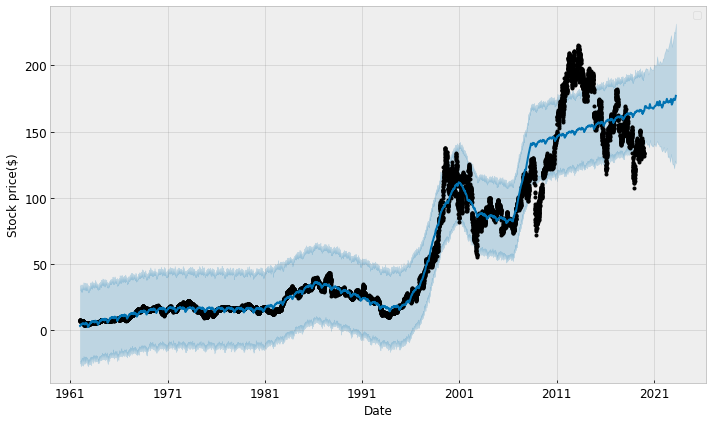

In [404]:
plt.style.use("bmh") 

ds_pro_model = Prophet(interval_width=0.95)
ds_pro_model.fit(ds_pro)

#ds_vol_model = Prophet(interval_width=0.95)
#ds_vol_model.fit(ds_vol)

ds_pro_forecast = ds_pro_model.make_future_dataframe(periods=40, freq='MS')
ds_pro_forecast = ds_pro_model.predict(ds_pro_forecast)

#ds_vol_forecast = ds_vol_model.make_future_dataframe(periods=30, freq='MS')
#ds_vol_forecast = ds_vol_model.predict(ds_vol_forecast)

plt.figure(figsize=(15, 6))
ds_pro_model.plot(ds_pro_forecast, xlabel = 'Date', ylabel = 'Stock price($)')
#ds_vol_model.plot(ds_vol_forecast, xlabel = 'Date', ylabel = 'Volume')

plt.legend()
plt.savefig('stock_prediction_prophet.jpg', bbox_inches = 'tight', transparent = True)
plt.show()

In [406]:
#y_forecasted = ds_pro_forecast
#y_truth = y_forecasted['2012-01-01':]
#mse = ((y_forecasted - y_truth) ** 2).mean()
#print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

In [ ]:
# Plotting forecasted price for 2020 using prophet
forecast = ds_pro_forecast[(ds_pro_forecast['ds'] > '2019-12-11') & (ds_pro_forecast['ds'] < '2021')] 
plt.figure(figsize=(15, 6))
plt.style.use("bmh") 
plt.title('Forecasted price using Prophet model')
plt.xlabel('Date')
plt.ylabel('Stock price ($)')
plt.plot(forecast['ds'], forecast['yhat'])

plt.savefig('stock_prediction_prophet_january2020.jpg', bbox_inches = 'tight', transparent = True)

plt.show()


# Moving averages 

In [180]:
pd.plotting.register_matplotlib_converters()

In [191]:
ds8 = ds[(ds['Date'] > '2019')]

In [192]:
ds8 = ds8.set_index('Date')

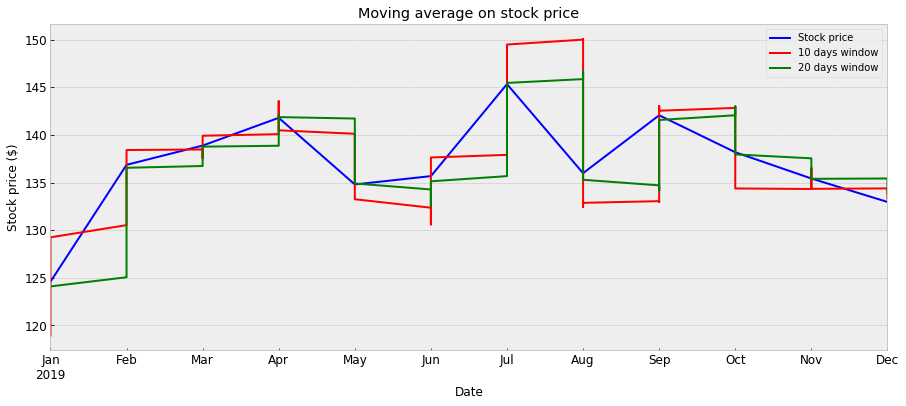

In [193]:
plt.style.use("bmh") 
plt.title('Moving average on stock price')
plt.xlabel('Date')
plt.ylabel('Stock price ($)')

ds8['Close'].resample('MS').mean().plot(figsize=(15, 6), color = 'blue', label = 'Stock price')
ds8['Close'].rolling(10).mean().shift().plot(figsize=(15, 6), color='red', label = '10 days window')
ds8['Close'].rolling(20).mean().shift().plot(figsize=(15, 6), color='green', label = '20 days window')

plt.legend()

plt.savefig('stock_pred_MA.jpg', bbox_inches = 'tight', transparent = True)
plt.show()

# Visualisations from KNN

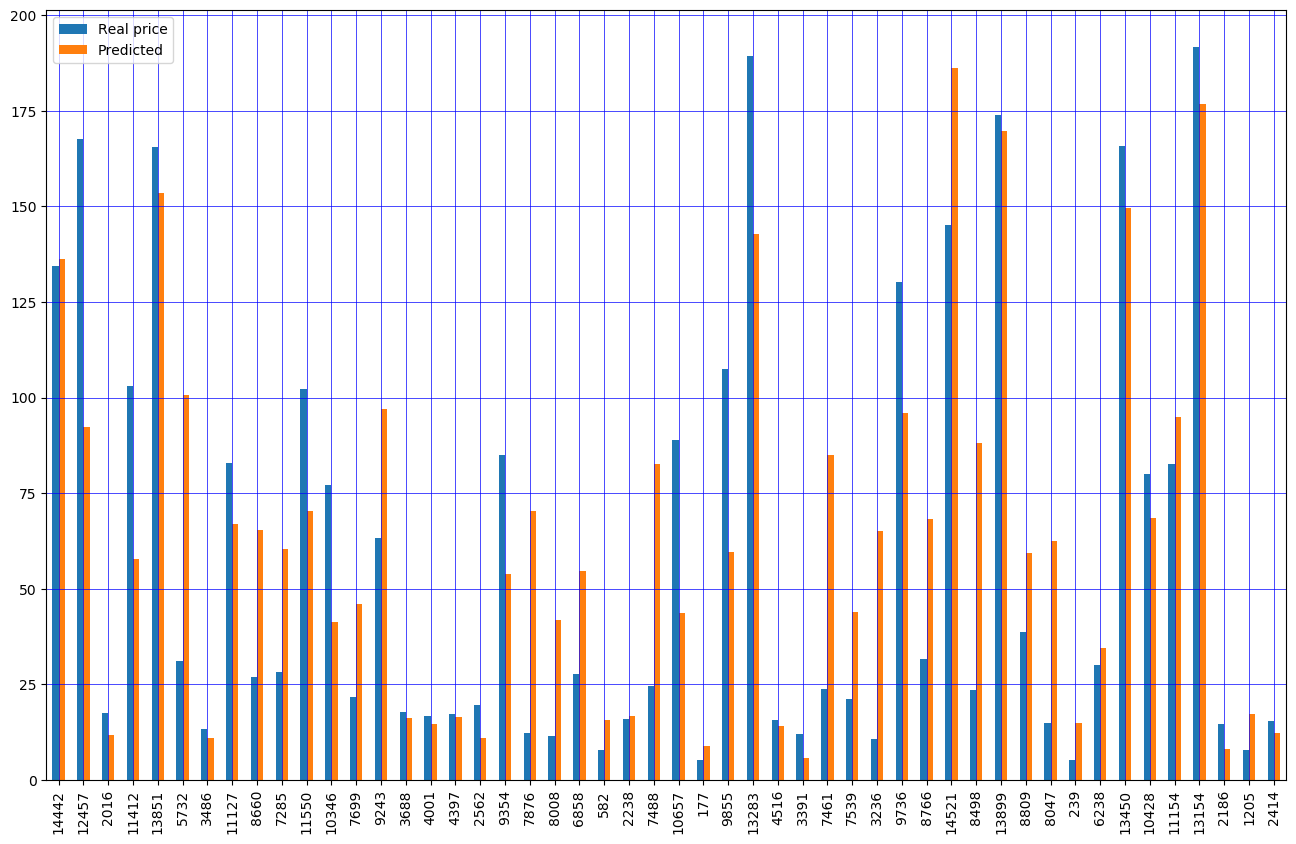

In [324]:
price_pred_1 = price_pred.sample(n=50, random_state=31)
plt.style.use("default") 
price_pred_1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='blue')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='green')
plt.show()

# 